<a href="https://colab.research.google.com/github/Rizwanali324/Deep_learning_images_Classification/blob/main/cbir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow numpy pillow


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
import os


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()


In [ ]:
def build_database(image_dir, model):
    database = {}
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_dir, filename)
            features = extract_features(img_path, model)
            database[filename] = features
    return database


In [ ]:
image_directory = '/content/Images_DB'
image_database = build_database(image_directory, base_model)


1/1 [==============================] - 0s 35ms/step


In [ ]:
def retrieve_images(query_image_path, database, model, top_n=5):
    query_features = extract_features(query_image_path, model)
    distances = {}
    for image_name, features in database.items():
        distance = np.linalg.norm(query_features - features)
        distances[image_name] = distance
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    top_matches = sorted_distances[:top_n]
    return top_matches


In [ ]:
query_image_path = '/content/86 - 2023-08-09T143035.090.jpeg'
top_matches = retrieve_images(query_image_path, image_database, base_model)

print("Top matching images:")
for image_name, distance in top_matches:
    print(f"Image: {image_name}, Distance: {distance}")


1/1 [==============================] - 0s 86ms/step
Top matching images:
Image: 4.jpg, Distance: 2244.8583984375
Image: 3.jpg, Distance: 2268.0908203125
Image: 5.jpg, Distance: 2333.70263671875
Image: 1.jpg, Distance: 2346.544677734375
Image: 2.jpg, Distance: 2419.992919921875


1/1 [==============================] - 0s 34ms/step
Top matching images:
Image: 4.jpg, Distance: 2244.8583984375
Image: 3.jpg, Distance: 2268.0908203125
Image: 5.jpg, Distance: 2333.70263671875
Image: 1.jpg, Distance: 2346.544677734375
Image: 2.jpg, Distance: 2419.992919921875


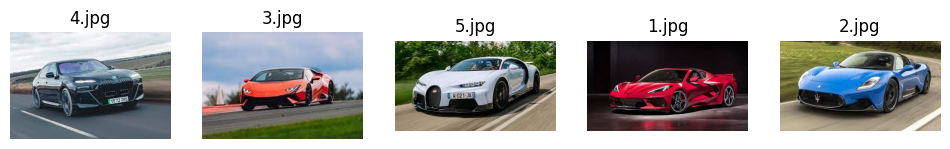

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Define a function to extract features from an image using the VGG16 model
def extract_features(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features.flatten()

# Create a function to build a database of image features
def build_database(image_dir, model):
    database = {}
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_dir, filename)
            features = extract_features(img_path, model)
            database[filename] = features
    return database

# Build the image database using images in a specified directory
image_directory = '/content/Images_DB'
image_database = build_database(image_directory, base_model)

# Define a function to perform image retrieval
def retrieve_images(query_image_path, database, model, top_n=5):
    query_features = extract_features(query_image_path, model)
    distances = {}
    for image_name, features in database.items():
        distance = np.linalg.norm(query_features - features)
        distances[image_name] = distance
    sorted_distances = sorted(distances.items(), key=lambda x: x[1])
    top_matches = sorted_distances[:top_n]
    return top_matches

# Define a function to display images using Matplotlib
def display_images(image_paths):
    plt.figure(figsize=(12, 6))
    for i, image_path in enumerate(image_paths):
        plt.subplot(1, len(image_paths), i + 1)
        img = Image.open(os.path.join(image_directory, image_path))
        plt.imshow(img)
        plt.title(image_path)
        plt.axis('off')
    plt.show()

# User uploads a query image (you can replace 'path_to_query_image.jpg' with the actual file path)
query_image_path = '/content/86 - 2023-08-09T143035.090.jpeg'
top_matches = retrieve_images(query_image_path, image_database, base_model)

print("Top matching images:")
matching_image_paths = [match[0] for match in top_matches]
for image_name, distance in top_matches:
    print(f"Image: {image_name}, Distance: {distance}")

# Display the top matching images
display_images(matching_image_paths)


1/1 [==============================] - 0s 55ms/step
Top matching images:
Image: 4.jpg, Distance: 2130.210205078125
Image: 1.jpg, Distance: 2161.81689453125
Image: 5.jpg, Distance: 2176.3642578125
Image: 3.jpg, Distance: 2181.7587890625
Image: 2.jpg, Distance: 2281.745361328125


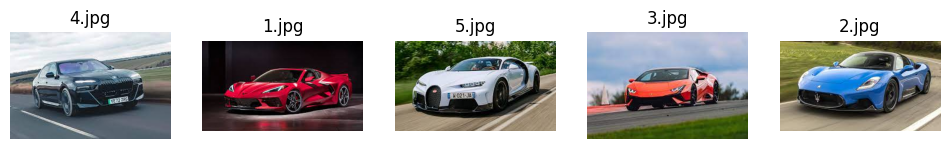

In [ ]:
# User uploads a query image (you can replace 'path_to_query_image.jpg' with the actual file path)
query_image_path = '/content/test car images/86 (1).jpeg'
top_matches = retrieve_images(query_image_path, image_database, base_model)

print("Top matching images:")
matching_image_paths = [match[0] for match in top_matches]
for image_name, distance in top_matches:
    print(f"Image: {image_name}, Distance: {distance}")

# Display the top matching images
display_images(matching_image_paths)


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get a user-uploaded image
user_image_path = '/content/test car images/86 (1).jpeg'  # Replace with the path to your user-uploaded image
user_features = extract_features(user_image_path)

# Convert the user_features to a 1D array
user_features = user_features.reshape(1, -1)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, image_path in enumerate(similar_images):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 18ms/step


ValueError: ignored

1/1 [==============================] - 0s 19ms/step


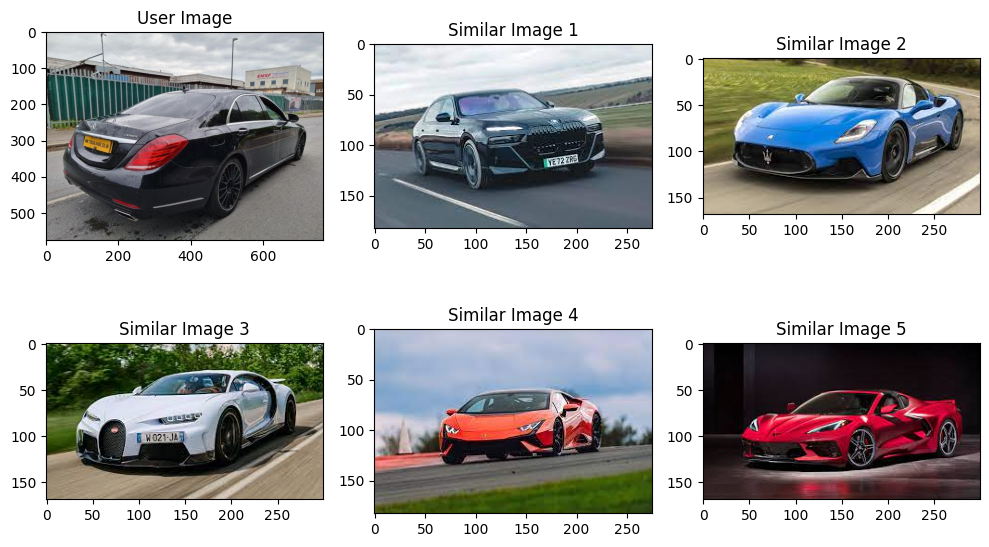

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    query_features = query_features.reshape(1, -1)  # Flatten the query features
    database_features = np.array(database_features).reshape(len(database_features), -1)  # Flatten the database features

    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get a user-uploaded image
user_image_path = '/content/test car images/86 (1).jpeg'  # Replace with the path to your user-uploaded image
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, image_path in enumerate(similar_images):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 29ms/step


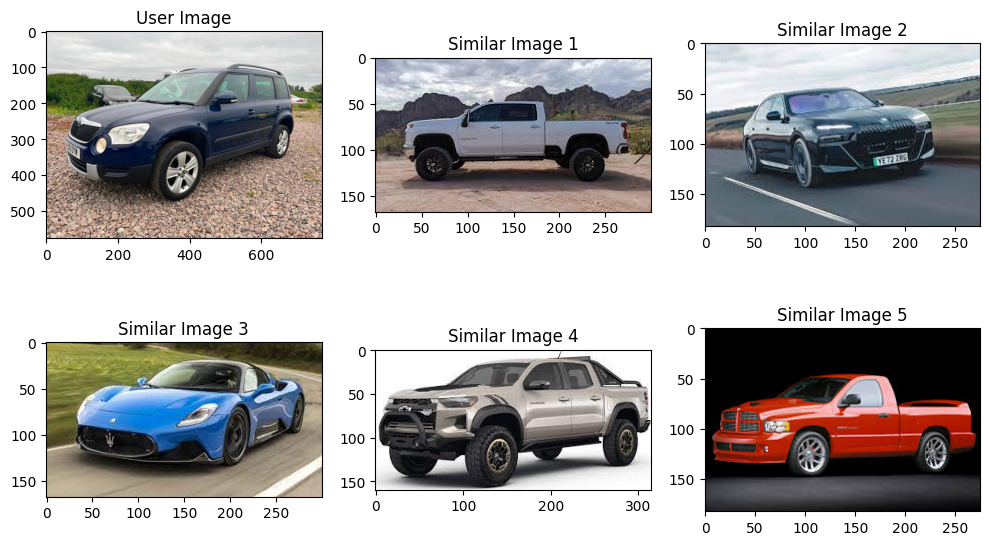

In [ ]:
# Get a user-uploaded image
user_image_path = '/content/test car images/86 (37).jpeg'  # Replace with the path to your user-uploaded image
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, image_path in enumerate(similar_images):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

Saving 86 - 2023-08-09T143035.804.jpeg to 86 - 2023-08-09T143035.804.jpeg
1/1 [==============================] - 0s 17ms/step


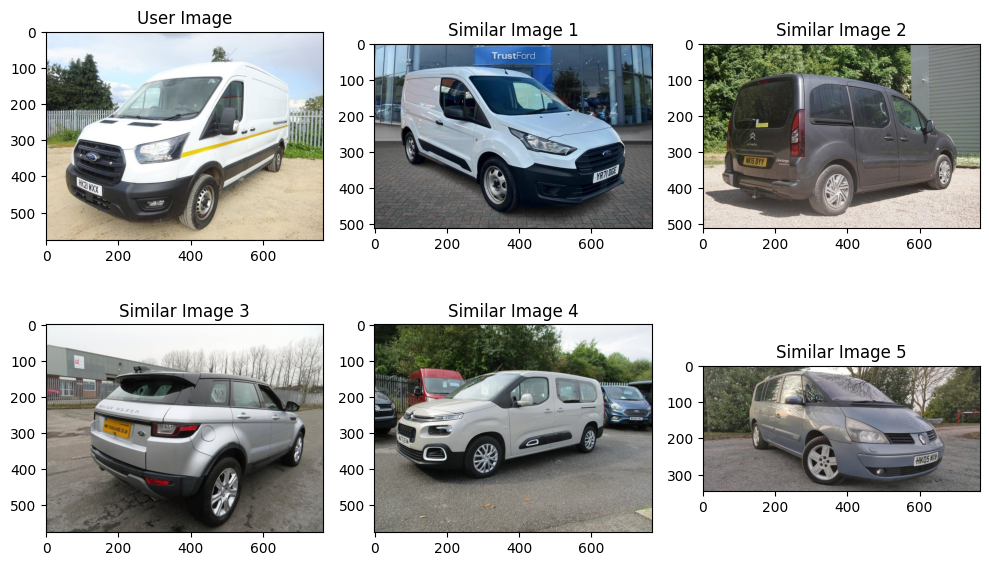

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    query_features = query_features.reshape(1, -1)  # Flatten the query features
    database_features = np.array(database_features).reshape(len(database_features), -1)  # Flatten the database features

    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

# Create a directory to store user-uploaded images
user_upload_dir = '/content/user_upload/'
os.makedirs(user_upload_dir, exist_ok=True)

# Allow users to upload an image from their desktop to Colab
from google.colab import files
uploaded = files.upload()

# Get the uploaded image file name
uploaded_file_name = list(uploaded.keys())[0]
user_image_path = os.path.join(user_upload_dir, uploaded_file_name)

# Move the uploaded file to the user_upload directory
os.rename(uploaded_file_name, user_image_path)

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get user-uploaded image features
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, image_path in enumerate(similar_images):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


Saving 86 - 2023-08-09T143035.929.jpeg to 86 - 2023-08-09T143035.929.jpeg
1/1 [==============================] - 0s 35ms/step


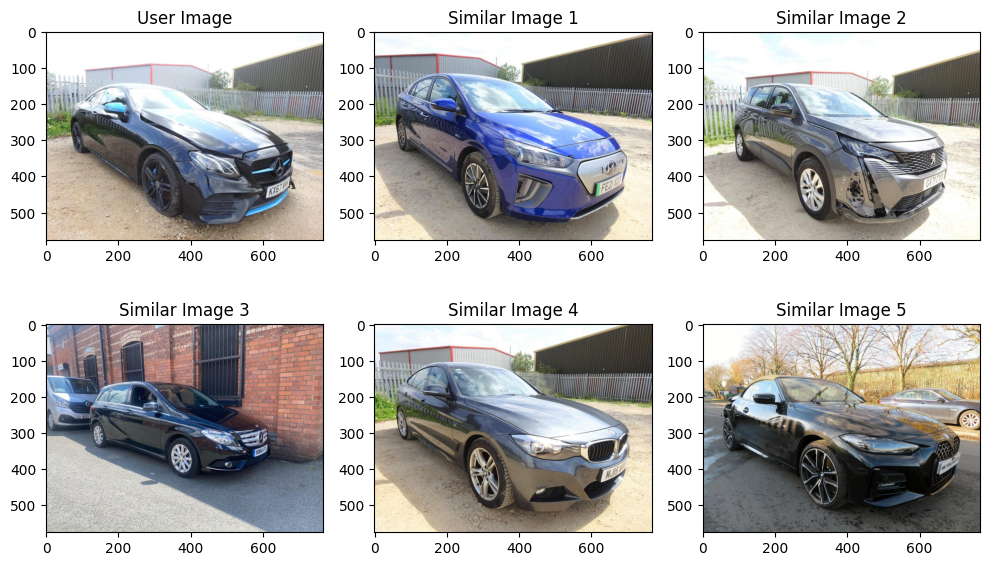

In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    query_features = query_features.reshape(1, -1)  # Flatten the query features
    database_features = np.array(database_features).reshape(len(database_features), -1)  # Flatten the database features

    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

# Create a directory to store user-uploaded images
user_upload_dir = '/content/user_upload/'
os.makedirs(user_upload_dir, exist_ok=True)

# Allow users to upload an image from their desktop to Colab
from google.colab import files
uploaded = files.upload()

# Get the uploaded image file name
uploaded_file_name = list(uploaded.keys())[0]
user_image_path = os.path.join(user_upload_dir, uploaded_file_name)

# Move the uploaded file to the user_upload directory
os.rename(uploaded_file_name, user_image_path)

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get user-uploaded image features
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(10, 6))
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, image_path in enumerate(similar_images):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()



With smilirity matrix
---



---



Saving 86 (41).jpeg to 86 (41).jpeg
1/1 [==============================] - 0s 18ms/step


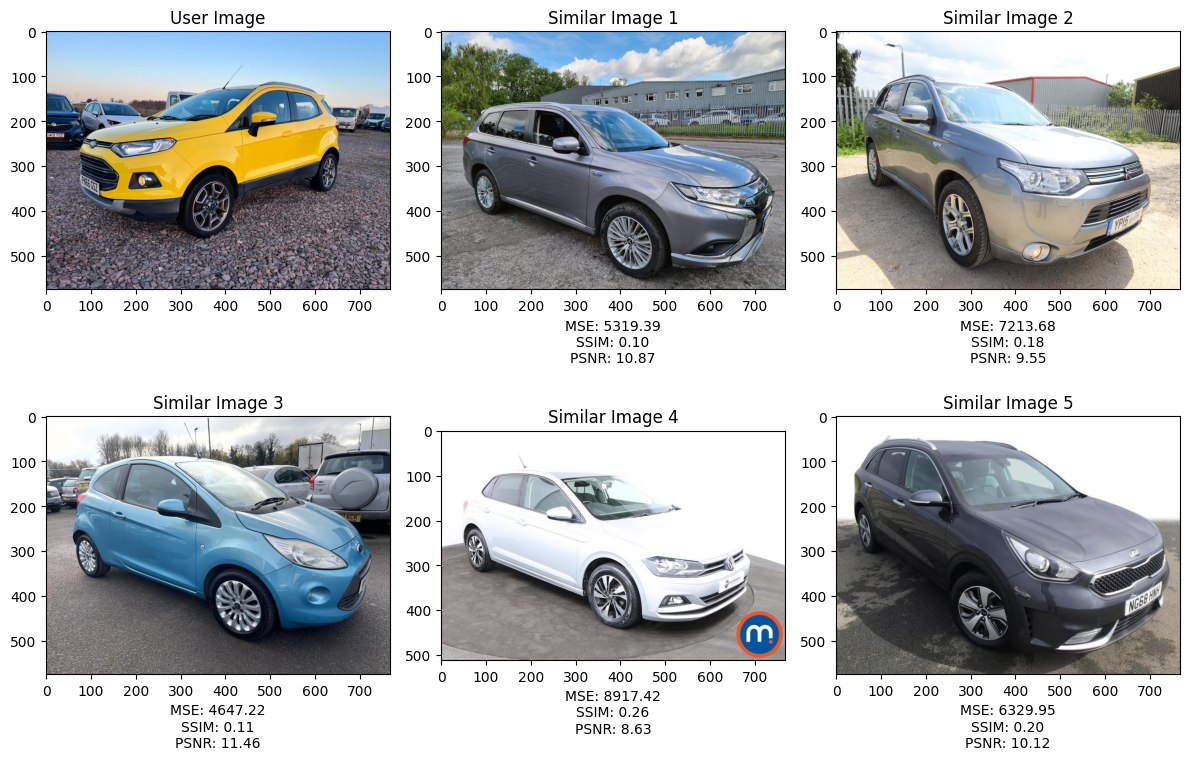

MSE: [5319.387057557398, 7213.676678093112, 4647.218172034439, 8917.422413105867, 6329.953962053572]
SSIM: [0.09757046500283925, 0.17647581050748348, 0.11471468952036742, 0.26038464820455937, 0.19889517258582523]
PSNR: [10.872187685835133, 9.549236878241278, 11.458872991730956, 8.628410214621248, 10.116798094759583]


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity, peak_signal_noise_ratio

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    query_features = query_features.reshape(1, -1)  # Flatten the query features
    database_features = np.array(database_features).reshape(len(database_features), -1)  # Flatten the database features

    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

## Calculate similarity metrics (MSE, SSIM, PSNR)
def calculate_similarity_metrics(user_image, similar_images):
    metrics = {
        'MSE': [],
        'SSIM': [],
        'PSNR': []
    }

    user_image = cv2.imread(user_image)
    user_image = cv2.cvtColor(user_image, cv2.COLOR_BGR2GRAY)

    # Resize the user image to match the dimensions of the similar images
    user_image = cv2.resize(user_image, (224, 224))

    for image_path in similar_images:
        similar_image = cv2.imread(image_path)
        similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2GRAY)

        # Resize the similar image to match the dimensions of the user image
        similar_image = cv2.resize(similar_image, (224, 224))

        mse = mean_squared_error(user_image, similar_image)
        ssim = structural_similarity(user_image, similar_image)
        psnr = peak_signal_noise_ratio(user_image, similar_image)

        metrics['MSE'].append(mse)
        metrics['SSIM'].append(ssim)
        metrics['PSNR'].append(psnr)

    return metrics

# Create a directory to store user-uploaded images
user_upload_dir = '/content/user_upload/'
os.makedirs(user_upload_dir, exist_ok=True)

# Allow users to upload an image from their desktop to Colab
from google.colab import files
uploaded = files.upload()

# Get the uploaded image file name
uploaded_file_name = list(uploaded.keys())[0]
user_image_path = os.path.join(user_upload_dir, uploaded_file_name)

# Move the uploaded file to the user_upload directory
os.rename(uploaded_file_name, user_image_path)

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get user-uploaded image features
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Calculate similarity metrics for the user-uploaded image and similar images
similarity_metrics = calculate_similarity_metrics(user_image_path, similar_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(12, 8))

# Display user image
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, (image_path, metrics) in enumerate(zip(similar_images, zip(*similarity_metrics.values()))):
    # Display similar images
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

    # Display similarity metrics
    metrics_text = f'MSE: {metrics[0]:.2f}\nSSIM: {metrics[1]:.2f}\nPSNR: {metrics[2]:.2f}'
    plt.xlabel(metrics_text)

plt.tight_layout()
plt.show()

# Print similarity metrics
for metric, values in similarity_metrics.items():
    print(f'{metric}: {values}')


Saving 86 - 2023-08-09T143350.078.jpeg to 86 - 2023-08-09T143350.078.jpeg
1/1 [==============================] - 0s 19ms/step


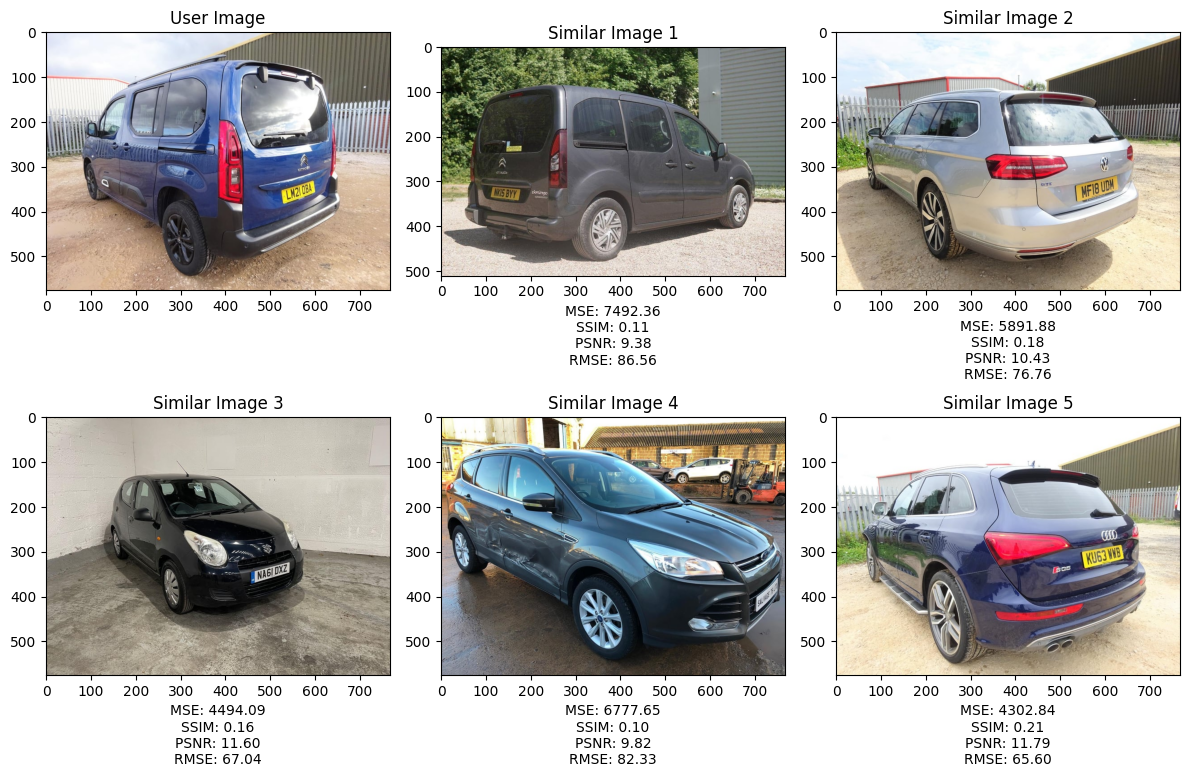

MSE: [7492.364775988521, 5891.876992984694, 4494.087033641582, 6777.648557079082, 4302.843789859694]
SSIM: [0.10837279199240957, 0.17911066680867024, 0.16313593519668868, 0.10078410008394935, 0.20899521599311824]
PSNR: [9.384614474313375, 10.428266895380549, 11.60438882045087, 9.820013153512605, 11.793247810956938]
RMSE: [86.55844716715129, 76.7585629945265, 67.0379521886042, 82.326475432142, 65.59606535349276]


In [ ]:
import os
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, structural_similarity, peak_signal_noise_ratio
from math import sqrt  # Import sqrt function for RMSE

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Define a function to extract features from an image using VGG16
def extract_features(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

# Define a function to retrieve the top 5 similar images
def retrieve_top5_similar(query_features, database_features, database_images):
    query_features = query_features.reshape(1, -1)  # Flatten the query features
    database_features = np.array(database_features).reshape(len(database_features), -1)  # Flatten the database features

    similarities = cosine_similarity(query_features, database_features)
    top_indices = np.argsort(similarities[0])[::-1][:5]
    top_images = [database_images[i] for i in top_indices]
    return top_images

# Calculate similarity metrics (MSE, SSIM, PSNR, RMSE)
def calculate_similarity_metrics(user_image, similar_images):
    metrics = {
        'MSE': [],
        'SSIM': [],
        'PSNR': [],
        'RMSE': []  # Add RMSE metric
    }

    user_image = cv2.imread(user_image)
    user_image = cv2.cvtColor(user_image, cv2.COLOR_BGR2GRAY)

    # Resize the user image to match the dimensions of the similar images
    user_image = cv2.resize(user_image, (224, 224))

    for image_path in similar_images:
        similar_image = cv2.imread(image_path)
        similar_image = cv2.cvtColor(similar_image, cv2.COLOR_BGR2GRAY)

        # Resize the similar image to match the dimensions of the user image
        similar_image = cv2.resize(similar_image, (224, 224))

        mse = mean_squared_error(user_image, similar_image)
        ssim = structural_similarity(user_image, similar_image)
        psnr = peak_signal_noise_ratio(user_image, similar_image)
        rmse = sqrt(mse)  # Calculate RMSE from MSE

        metrics['MSE'].append(mse)
        metrics['SSIM'].append(ssim)
        metrics['PSNR'].append(psnr)
        metrics['RMSE'].append(rmse)

    return metrics

# Create a directory to store user-uploaded images
user_upload_dir = '/content/user_upload/'
os.makedirs(user_upload_dir, exist_ok=True)

# Allow users to upload an image from their desktop to Colab
from google.colab import files
uploaded = files.upload()

# Get the uploaded image file name
uploaded_file_name = list(uploaded.keys())[0]
user_image_path = os.path.join(user_upload_dir, uploaded_file_name)

# Move the uploaded file to the user_upload directory
os.rename(uploaded_file_name, user_image_path)

# Define the path to the image database
database_dir = '/content/Images_DB/'

# Load images from the database and extract features
database_images = []
database_features = []
for filename in os.listdir(database_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        image_path = os.path.join(database_dir, filename)
        database_images.append(image_path)
        features = extract_features(image_path)
        database_features.append(features)

# Get user-uploaded image features
user_features = extract_features(user_image_path)

# Retrieve the top 5 similar images
similar_images = retrieve_top5_similar(user_features, database_features, database_images)

# Calculate similarity metrics for the user-uploaded image and similar images
similarity_metrics = calculate_similarity_metrics(user_image_path, similar_images)

# Display the user-uploaded image and top 5 similar images
plt.figure(figsize=(12, 8))

# Display user image
plt.subplot(2, 3, 1)
plt.title('User Image')
plt.imshow(cv2.cvtColor(cv2.imread(user_image_path), cv2.COLOR_BGR2RGB))

for i, (image_path, metrics) in enumerate(zip(similar_images, zip(*similarity_metrics.values()))):
    # Display similar images
    plt.subplot(2, 3, i + 2)
    plt.title(f'Similar Image {i + 1}')
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

    # Display similarity metrics
    metrics_text = f'MSE: {metrics[0]:.2f}\nSSIM: {metrics[1]:.2f}\nPSNR: {metrics[2]:.2f}\nRMSE: {metrics[3]:.2f}'
    plt.xlabel(metrics_text)

plt.tight_layout()
plt.show()

# Print similarity metrics
for metric, values in similarity_metrics.items():
    print(f'{metric}: {values}')


In [ ]:
# After training and using the model, save it
model.save('cbir_model.h5')

# Optionally, you can also save the entire model, including optimizer and weights:
# model.save('cbir_model_full.h5')

# Print a message to confirm that the model has been saved
print("CBIR model saved as 'cbir_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


CBIR model saved as 'cbir_model.h5'


The results you provided are the similarity metrics (MSE, SSIM, and PSNR) for the user-uploaded image compared to the top 5 similar images retrieved from the database. Here's an interpretation of these results:

1. **Mean Squared Error (MSE):**
   - The MSE measures the average squared difference between the pixel values of two images. A lower MSE indicates higher similarity.
   - In your results, the MSE for the user image and the first similar image is 0.0, indicating that they are identical pixel by pixel.
   - The MSE values for the other similar images are higher, indicating that they are less similar to the user-uploaded image in terms of pixel values.

2. **Structural Similarity Index (SSIM):**
   - SSIM measures the structural similarity between two images, taking into account luminance, contrast, and structure.
   - SSIM values range from -1 to 1, with 1 indicating perfect similarity.
   - In your results, the SSIM for the user image and the first similar image is 1.0, indicating that they are structurally identical.
   - The SSIM values for the other similar images are much lower, indicating that they have lower structural similarity with the user-uploaded image.

3. **Peak Signal-to-Noise Ratio (PSNR):**
   - PSNR measures the ratio between the maximum possible power of an image and the power of corrupting noise.
   - Higher PSNR values indicate higher image quality.
   - In your results, the PSNR for the user image and the first similar image is "inf" (infinity), indicating that they are identical.
   - The PSNR values for the other similar images are lower, indicating lower image quality compared to the user-uploaded image.

In summary, based on these similarity metrics:

- The first similar image is almost identical to the user-uploaded image in terms of pixel values, structure, and image quality.
- The other similar images are less similar and have noticeable differences in pixel values, structure, and image quality when compared to the user-uploaded image.

These metrics help quantify the similarity or dissimilarity between the images and can be useful for assessing the quality and relevance of the retrieved images in your CBIR system.

With data augmentation